## Importing Libraries

In [34]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import skimage

## Original Image

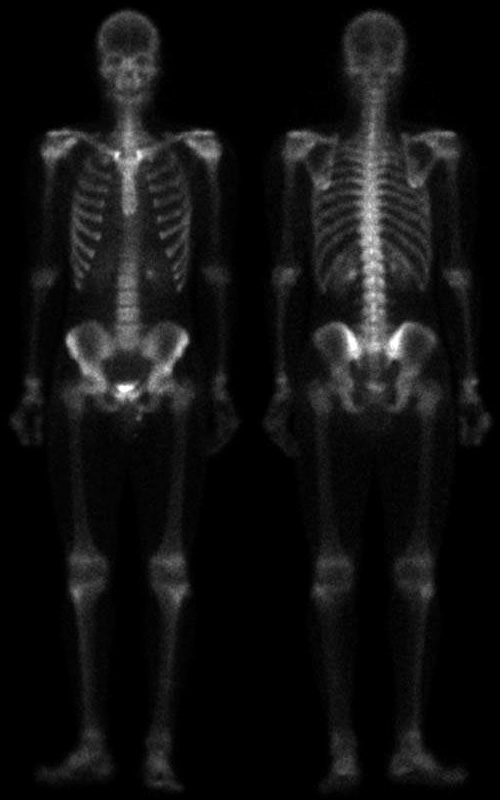

In [35]:
# loading the original image
skeleton = cv2.imread('skeleton.tif')
skeleton = cv2.cvtColor(skeleton, cv2.COLOR_BGR2GRAY)
cv2_imshow(skeleton)

## Laplacian of the Original Image

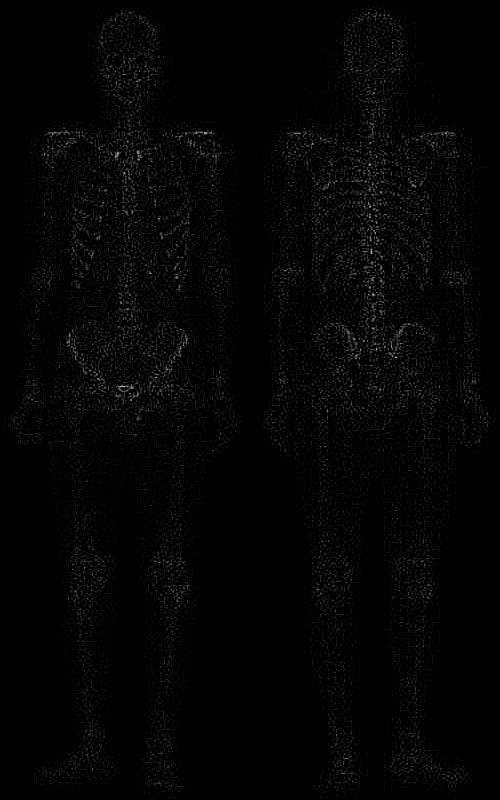

In [36]:
# defining the laplacian kernel
laplacian_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# convolving the kernel with the image
laplacian_skeleton = cv2.filter2D(skeleton, ddepth = -1, kernel = laplacian_kernel)
laplacian_kernel = (laplacian_kernel*255).astype(np.uint8)
cv2_imshow(laplacian_skeleton)

## Sharpened Image by adding Original image with Laplacian

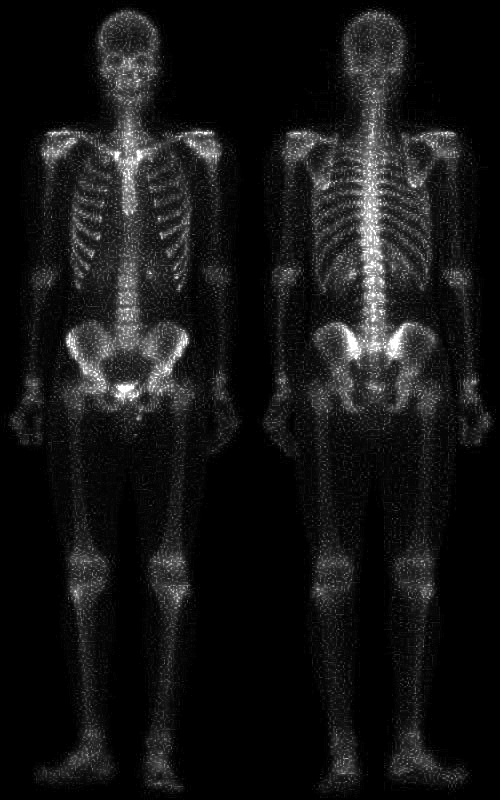

In [37]:
# adding original image to the laplacian image to get a sharpened image
sharpened_image = cv2.add(skeleton, laplacian_skeleton)
cv2_imshow(sharpened_image)

## Sobel Gradient of Original Image

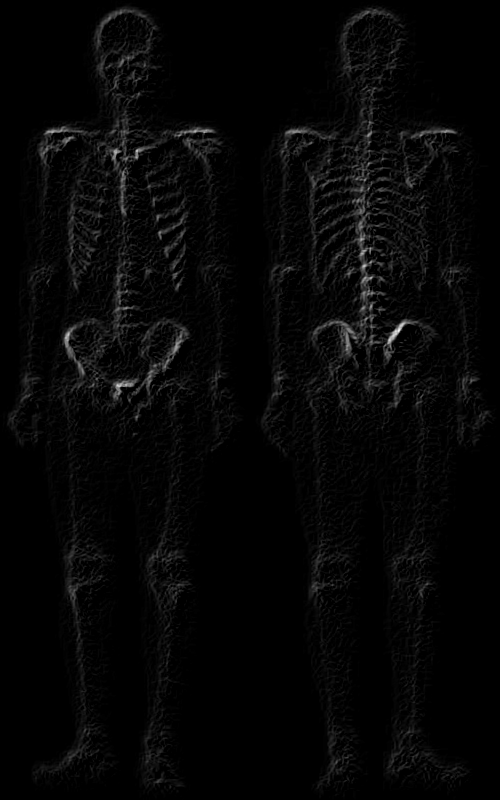

In [38]:
# defining sobel filters
grad_x = cv2.Sobel(skeleton, -1, 1, 0, ksize=3)
grad_y = cv2.Sobel(skeleton, -1, 0, 1, ksize=3)

# adding the sobel filter outputs
sobel_skeleton = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)
cv2_imshow(sobel_skeleton)

## Smoothed Gradient Image

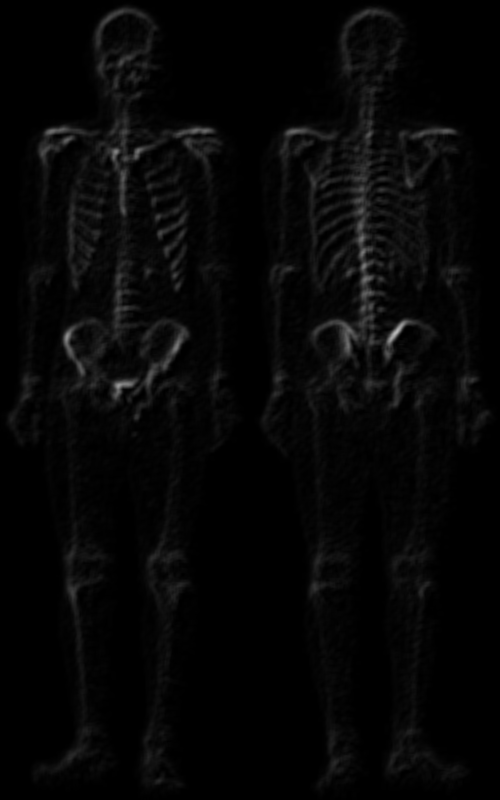

In [39]:
# defining the box kernel
box_kernel = np.ones((5,5),np.float32)/25

# applying the kernel on the image
smoothed_sobel_skeleton = cv2.filter2D(sobel_skeleton, ddepth = -1, kernel = box_kernel)
cv2_imshow(smoothed_sobel_skeleton)

## Mask (formed by product of Laplacian Image and Smoothed Sobel Image)

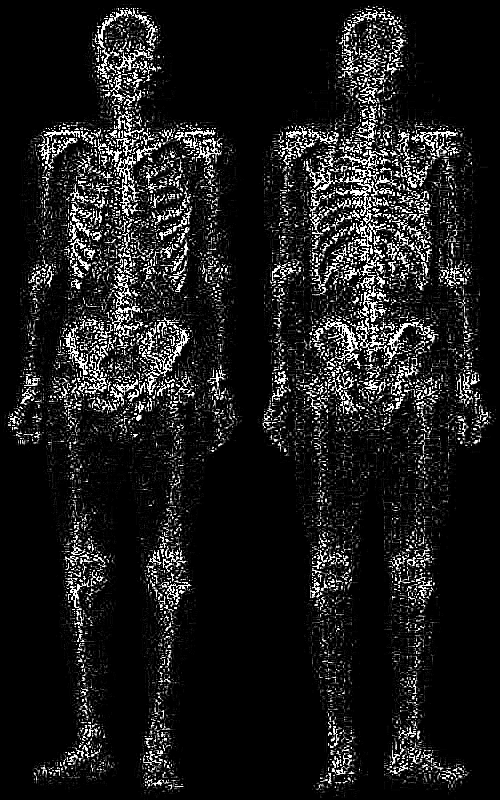

In [40]:
mask = cv2.multiply(laplacian_skeleton, smoothed_sobel_skeleton)
cv2_imshow(mask)

# Sharpened Image (Obtained by adding Original Image to Mask)

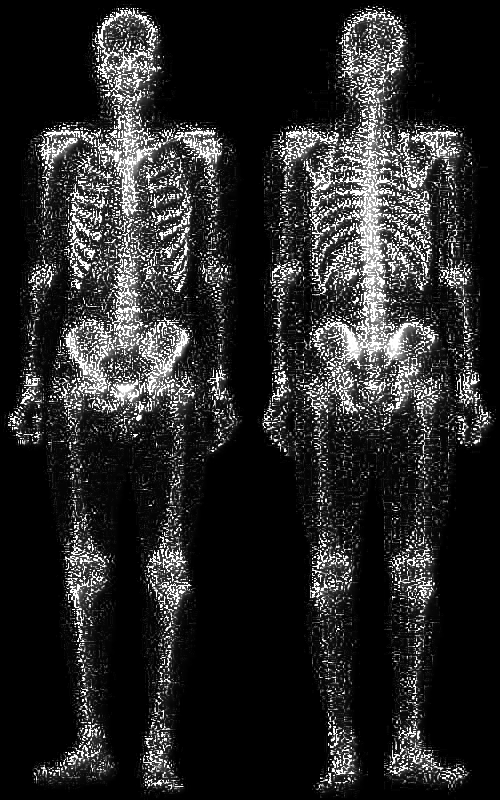

In [41]:
sharpened_image_2 = cv2.add(skeleton, mask)
cv2_imshow(sharpened_image_2)

## Power Law Transformation

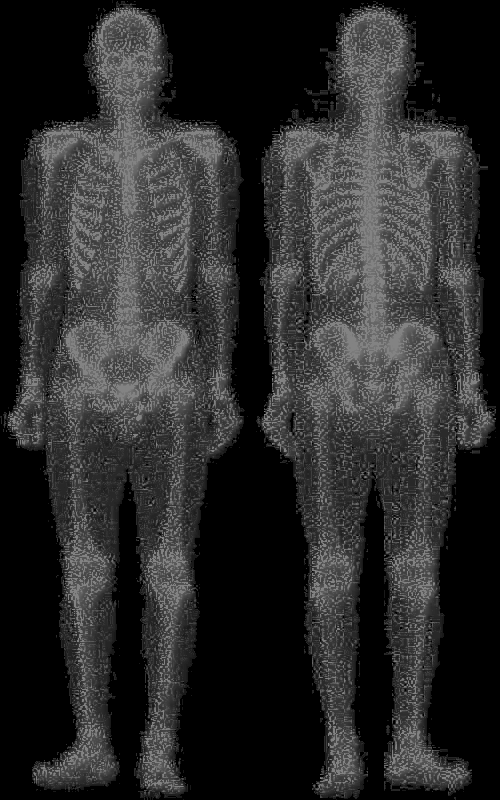

In [42]:
# power law transformation
result = 25 * (sharpened_image_2 ** 0.3)
cv2_imshow(result)